#### ML01: Introduction to Classification

Now we've explored and understood some basic ML terms, let's see if we can put these into practice on a simple project!

To get things started we're going to be using a Python library called [Scikit-Learn](http://scikit-learn.org/stable/). Scikit-Learn (or SKL for short) is without a doubt the most popular library for basic ML in Python. There are a number of reasons for this, but for the most part it is very well designed, powerful yet easy to use and the available [documentation](http://scikit-learn.org/stable/documentation.html) and [tutorials](http://scikit-learn.org/stable/tutorial/index.html) are brilliant.

We'll be using SKL on a very simple ML project that will see us:

1. Load, explore & visualise the data.
2. Identify the Machine Learning task.
3. Choose the model (aka algorithm)
4. Fit this model to our data
5. Test how well the model performs

**Installation**

We can install SKL as follows:  
```pip install scikit-learn==0.19.2```
Note that the version of scikit-learn that we're using for this part of the course is 0.19.2 so we've specified the specific version in the `pip install` command. The SKL API can change quite significantly and there's no guarentee that subsequent versions will work with this version of the code.

**Data**  

We will need some data before we get started. Another great thing about SKL is that it has some good datasets to get us started. One particularly famous dataset we're going to use is the [Iris Dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). This is a very famous dataset often used in statistics and data science to demonstrate building statistical and machine learning models.

You can see that step 1 is all about loading, exploring and visualising the data, so we'll need to import our go-to libraries for this alongside the dataset as follows:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
iris = datasets.load_iris()
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 500)

If we take a look at the iris dataset, we can see that it's actually a custom SKL class called a Bunch:

In [4]:
type(iris)

sklearn.utils.Bunch

If we want to find out more about a Bunch we can ask Python and SKL for help, via the `help()` function:

In [5]:
help(iris)

Help on Bunch in module sklearn.utils object:

class Bunch(builtins.dict)
 |  Container object for datasets
 |  
 |  Dictionary-like object that exposes its keys as attributes.
 |  
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |  
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __dir__(self)
 |      __dir__() -> list
 |      default dir() implementation
 |  
 |  __getattr__(self, key)
 |  
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __setattr__(self, key, value)
 |      Implement setattr(self, name, value).
 |  
 |  __setstate__(self, state)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__


Whilst a bunch is great for using in SKL, it's less good for exploring and visualising, since this is easier in pandas, so we'll convert the data to a pandas dataframe for easier analysis:

In [6]:
# Creating a df
df = pd.DataFrame(
    data=iris.data,
    columns=iris.feature_names
)
df['species'] = iris.target

# Decoding the class
iris_target_decodes = {
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
}

df_viz = df.replace({"species": iris_target_decodes})
df_viz.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Data**

You'll see here that we have 4 numeric variables as follows:

* `sepal length (cm)`
* `sepal width (cm)`
* `petal length (cm)`
* `petal width (cm)`

These numeric variables relate to the measurments of the sepal and petal taken from a sample of 150 Iris flowers (50 of each species).  

We also have one categorical variable as follows:

* `species`

This relates to the species of iris that the samples were taken from.


** The Machine Learning Task**

You'll see that the species variable has three values: *setosa*, *versicolor* and *virginica* and we're going to see how well we can predict these values  using the numeric variables.

Looking back over the terminology from the previous chapter we can see that:

* This is a **Supervised Learning** task since we're feeding our algorithm the desired solutions, however it could just as easily be an **Unsupervised Learning** task since we could ask our algorithm to present us patterns in the data without showing it the solutions.
* This is also a **Classification Task** since we're trying to predict the species of flower which is a **Categorical** variable.
* The species variable is our **label** (the value we're trying to predict) 
* The numeric variables (`sepal length, sepal width, petal length, petal width`) are our **features** or **predictors**, which are the attributes that we're going to make our prediction based on.

**Basic Data Exploration**

Now we're imported our data, we need to explore it. In reality we'd spend some time looking at things such as missing values, correlations, distribution etc. as these can all provide us with important information about the data and influence how we approach our ML task.

However since this is a quick example, with a very clean dataset, this is probably unnecessary and something we'll be exploring in the upcoming chapters anyway. However, we will go through some basic visualisation that you can do with Seaborn.

**Data Visualisation**

We'll start by using a [Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html). This will plot all the columns within the dataset against one another:

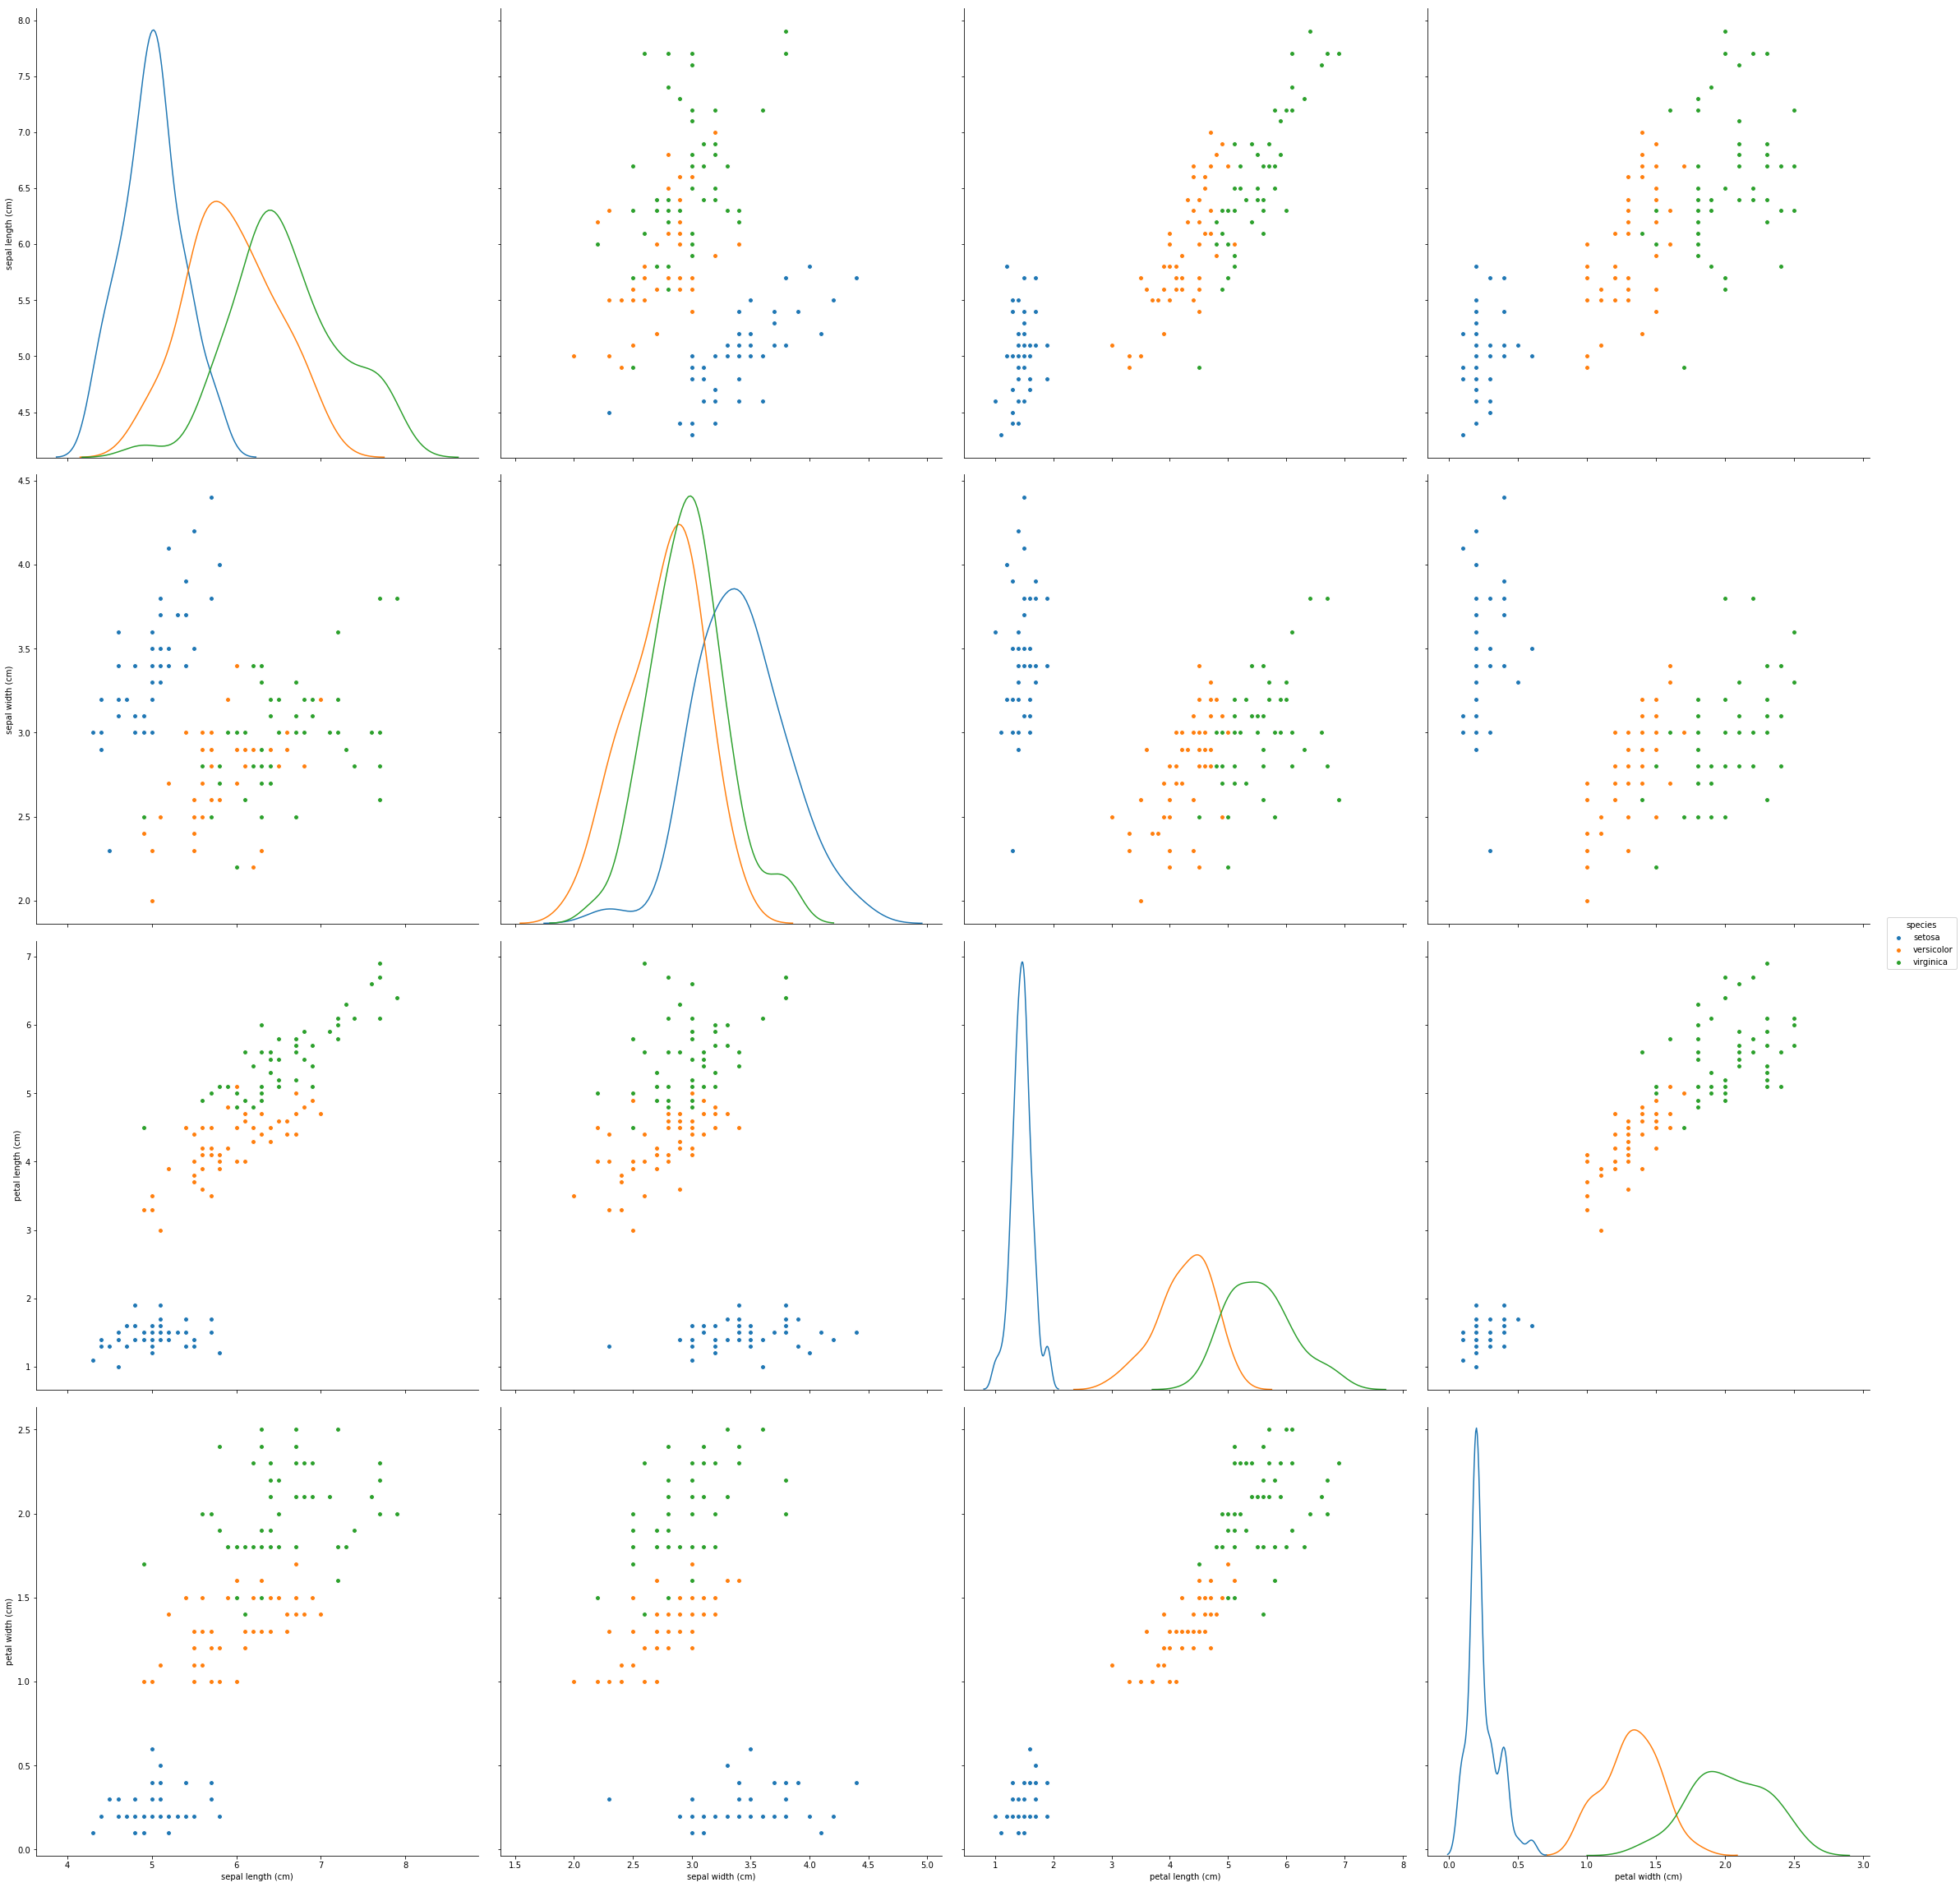

In [7]:
pairplot1 = sns.pairplot(
    data=df_viz, 
    hue="species",
    diag_kind='kde',
    size=8
)

You can see that the *setosa* values in blue is clearly separated in some of the charts but the versicolour and virginica values are not, although the *virginica* tends to have wider and longer petals and sepals than the *versicolour*. This means that there may be some scope for an ML algorithm to predict the flower type which is our **label** value in this case.

**Train & Test Datasets**

Before we can do any customisation or algorithm selection, we much first prepare the data and the first stage of this is splitting the data into separate **training** and **test** or **validation** datasets so that we can use one to **train** our model (the process of showing the model some data so that it can learn a pattern) and use the other to **test** our trained model to see how well it performs.

![train test split](../img/train-test.png)

This is important for two reasons. 

1. We generally create ML algorithms on a training dataset in order to transfer them to unseen data in order to make predictions. If we don't have any idea how they'll perform on unseen data, we can't generally evaluate how good they are.

2. We want to ensure that our data is is well fitted to the data. If we **overfit** our data, the model will learn the patterns in our data 'too' well and perform very well on our training set but will not [generalise](https://www.quora.com/What-is-generalization-in-machine-learning) (perform on new and unseen data) well. On the other hand if we don't provide enough data or **features** / **predictors** to our model, or don't fine-tune the model properly, we run the risk of **underfitting** our data, where the model will miss trends and generally do a poor job of producing predictions.

The diagram below illustates this nicely:

![over & under fitting](../img/underfitting-overfitting.png)



For these reasons splitting our data into **training** and **test** datasets is vital.

**Splitting our data**

In this example, we'll provide our training set with the known output (aka the **label** variable) which in this case, is the species of Iris. We'll be able to train our model on the **train** set before applying it to the **test** set. The test set will not contain the **label** variable in order for us to see how well our algorithm performs.

Scikit-learn has a handy `train_test_split` function that allows us to easily split our data into **training** and **test** datasets.

We're going to pass a decimal value to the `test_size` keyword argument to indicate the percentage size that we'd like the test size to encompass as a whole. There is no set rule around this but generally the maximum **test** dataset size is around 30% of the total records in the whole dataset. Here we're going to use 20%.  

Additionally we're going to pass a `random_state` keyword argument with a random integer. This provides a seed to the random number generator which splits the dataset and ensure that if we re-run our code we get exactly the same records in our train and test datasets.

Note that `train_test_split` can take a number of different types of input, including pandas dataframes, numpy arrays as well as lists. Here we're inputting the numpy arrays for `iris.data` and `iris.target` that we loaded earlier but it would have been just as easy to use a pandas dataframe so long as it's correctly formatted.

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris.data[:, [2, 3]], # select petal columns only
    iris.target, 
    test_size=0.2, 
    random_state=3
)

Let's go through what the `train_test_split` function is doing:

You'll see that we get four outputs from the train_test_split function: `X_train, X_test, y_train, y_test`. 

**X** (upper case) is the naming convention for the **features** matrix.  
**y** (lower case) is the naming convention for our **label**.

We create train and test datasets for both our **features** matrix and our **label**.

We have two datasets for each: **train** and **test**.

You'll also see that we're passing two positional arguments to our `train_test_split` function:  
* The first positional argument is for our **feature matrix (X)** which contains the values upon which we'll train our ML algorithm to predict our **target**.  
* The second positional argument is for our **target matrix (y)** which contains the **target** values we want to predict via applying an ML algorithm to our **features**.

**Choosing an Algorithm**

As with data exploration earlier, choosing the correct algorithm and refining and optimising it is where Machine Learning engineers really earn their money. We'll be going into more detail about algorithms later on in the course, but for now we'll start with a basic [Logistic Regression](https://www.statisticssolutions.com/what-is-logistic-regression/) algorithm.

In [33]:
from sklearn.linear_model import LogisticRegression

# Create a blank Logistic Regression Class object
model = LogisticRegression() 
# Train the model with the training set
model.fit(X_train, y_train)
# Test the model against the actual values
print (
    'LR Accuracy: {}%'.format(
        round(100*(model.score(X_test,y_test)),1)
    )
)

LR Accuracy: 90.0%


And voila!! We've just trained our first model and we can see here that the model is **90%** accurate - well done us!!  

But what if we wanted to try out a different model? One of the great things about SKL is that a lot of the models share the same syntax so if we want to change our model, we can just substitute in a different one, in this case a [Naive Bayes Classifier](http://www.statsoft.com/textbook/naive-bayes-classifier):

In [34]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
print (
    'NB Accuracy: {}%'.format(
        round(100*(model.score(X_test,y_test)),1)
    )
)

NB Accuracy: 100.0%


**100%** accuracy? We should definitely get our applications in to Google for that Machine Learning Engineer position!! 

You'd be forgiven for thinking that the Naive Bayes model we picked is automatically better than the Logistic Regression, however there are a couple of other things to consider here:

1. A high score such as this could be an indication of **Overfitting** as mentioned previously. Even though we're trying to avoid it, there could be biases in the **train** and **test** datasets that we're unwittingly selecting.

2. We have quite a small dataset (just 150 records) on which we're training and testing our algorithm and it could be that there's some natural variance in our algorithm's performance based upon the records in the **train** and **test** datasets. 

We can illustrate this by running the train / test split and model again with a different `random_state` value in our `train_test_split` function:

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data[:, [2, 3]], # select petal columns only
    iris.target, 
    test_size=0.2, 
    random_state=7
)


model = LogisticRegression() 
model.fit(X_train, y_train)
print (
    'LR Accuracy: {}%'.format(
        round(100*(model.score(X_test,y_test)),1)
    )
)

model = GaussianNB()
model.fit(X_train, y_train)
print (
    'Accuracy: {}%'.format(
        round(100*(model.score(X_test,y_test)),1)
    )
)

LR Accuracy: 73.3%
Accuracy: 86.7%


Here we can see that both our models perform a lot worse than before, although the Naive Bayes classifier still outperforms our Logistic Regression Classifier.

So how can we get around this? The answer is with **cross validation**

**Cross Validation**  

[Cross validation](https://machinelearningmastery.com/k-fold-cross-validation/) is very similar to the concept of the **train / test split** however instead of simply building a single model on a single split of **train** and **test** data we build multiple models based on multiple different cuts of the data and evaluate these collectively. This gives us a far more accurate picture of a model's performance. However this comes at the price of speed, in that on larger datasets training multiple models will take a lot longer and more computational power.

One popular **cross validation** technique is the **k-fold** technique, where the data is split into $k$ different 'folds' or 'cuts' and we use $k-1$ of these and leave the last fold as **test** or **validation** data. This is illustrated in the following diagram:

![K Fold Cross Validation](../img/k-fold-cross-validation.png)

The simplest way to apply **k-fold cross validation** is to use scikit-learn's `cross_val_score` function as follows:

In [70]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression()
scores = cross_val_score(model, iris.data[:, [2, 3]], iris.target, cv=5)

Here you can see we've given the `cross_val_score` function four arguments:

1. Our model
2. Our feature matrix
3. Our label
4. The number of folds that we want via the `cv=` keyword argument

As an output we get a numpy array with the various accuracy ratings from our model.

We can then build a simple print iterator to output the scores as follows:

In [71]:
for score in scores:
    print('{}%'.format(round(score*100,1)))

86.7%
83.3%
83.3%
80.0%
100.0%


Or we can average the scores via the `mean()` method:

In [81]:
model = LogisticRegression()
scores = cross_val_score(model, iris.data[:, [2, 3]], iris.target, cv=50)
print('Logistic Regression Average: {}%'.format(round(scores.mean()*100,1)))

Logistic Regression Average: 87.3%


We can then compare this to our Naive Bayes Classifer much more accurately as follows: 

In [80]:
model = GaussianNB()
scores = cross_val_score(model, iris.data[:, [2, 3]], iris.target, cv=50)
print('Naive Bayes Average: {}%'.format(round(scores.mean()*100,1)))

Naive Bayes Average: 96.0%


**Visualising our Model**

Visualising your models is really important when you're learning ML as this helps bring ML to life and you'll be able to see the impact of the changes that you make.

We're going to use a [Numpy Meshgrid](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.meshgrid.html) for this:

In [98]:
# Creating the meshgrid

h = 0.01 # Setting the resolution of the meshgrid

x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h), 
    np.arange(y_min, y_max, h)
)
print(xx.shape)
print(xx)

(340, 690)
[[0.5  0.51 0.52 ... 7.37 7.38 7.39]
 [0.5  0.51 0.52 ... 7.37 7.38 7.39]
 [0.5  0.51 0.52 ... 7.37 7.38 7.39]
 ...
 [0.5  0.51 0.52 ... 7.37 7.38 7.39]
 [0.5  0.51 0.52 ... 7.37 7.38 7.39]
 [0.5  0.51 0.52 ... 7.37 7.38 7.39]]


What we've done here is create a 340 x 960 array. What we can then do is assign one of our classifications to each 'cell' in the grid to build a picture of how our model is classifying the data. Note that if we change the `h` value, the grid will change in size accordingly. We combine our meshgrid with the `pcolormesh` method in Matplotlib to create our visualisation as follows:

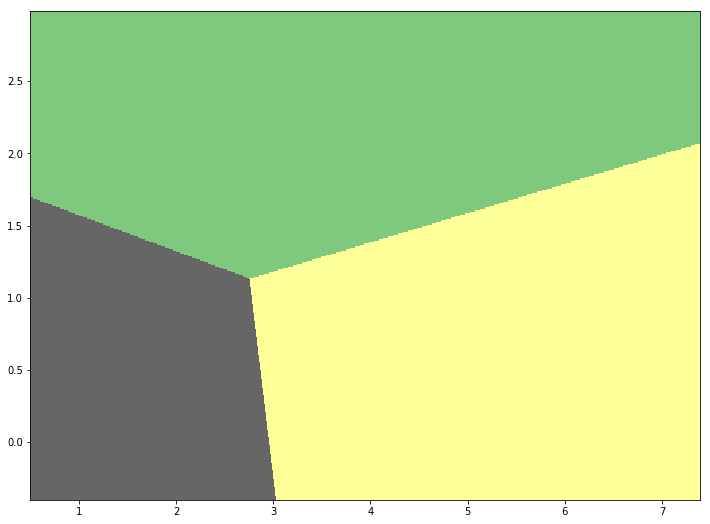

In [124]:
# Re-running our Logistic Regression Model

model = LogisticRegression() 
model.fit(X_train, y_train) 

# ravel() reshapes the array for visualisation
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
# Reshape the predictions to match the axes
Z = Z.reshape(xx.shape)
# Plot the figure
plt.figure(1, figsize=(12, 9))
# Plot the Colourmesh
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Accent_r)

However... It would be a lot better to include our actual data on there also! And it's probably good to wrap it up in a function as well since we'll want to compare the two models we've created.

In [135]:
def ml_model(algorithm, title):
    '''
    Runs an ML algorithm on the Iris datset and visualises
    the results.
    '''
    
    # Fitting the model
    model = algorithm
    model.fit(X_train, y_train) 
    
    # Constructing the meshgrid
    h = 0.01
    x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
    y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h), 
        np.arange(y_min, y_max, h)
    )

    # Fitting the model to the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(12, 9))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Accent_r)

    # Plot the training points
    plt.scatter(
        X_train[:, 0], 
        X_train[:, 1], 
        c=y_train, 
        edgecolors='k', 
        cmap=plt.cm.Accent_r
    )
    # Labels
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')

    # Setting the boundaries
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    # Removing the ticks
    plt.xticks(())
    plt.yticks(())
    
    # Setting the title
    plt.title(title)
    
    # Visualising
    plt.show()

We can now call our function for the two models that we've created and compare the algorithms:

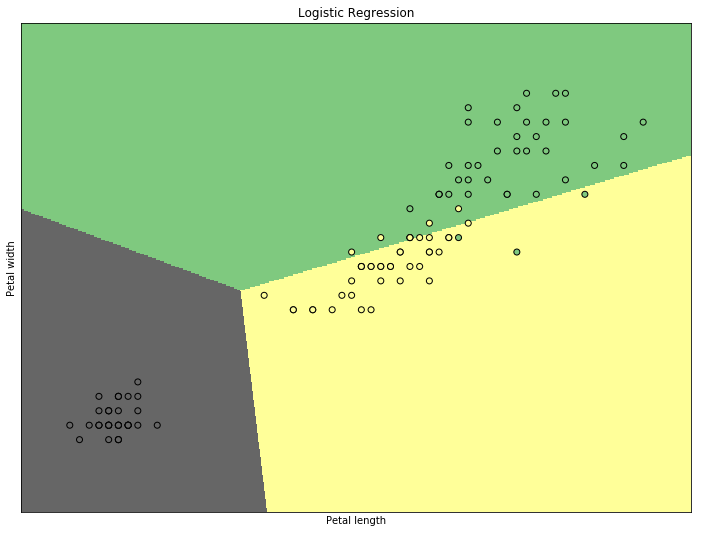

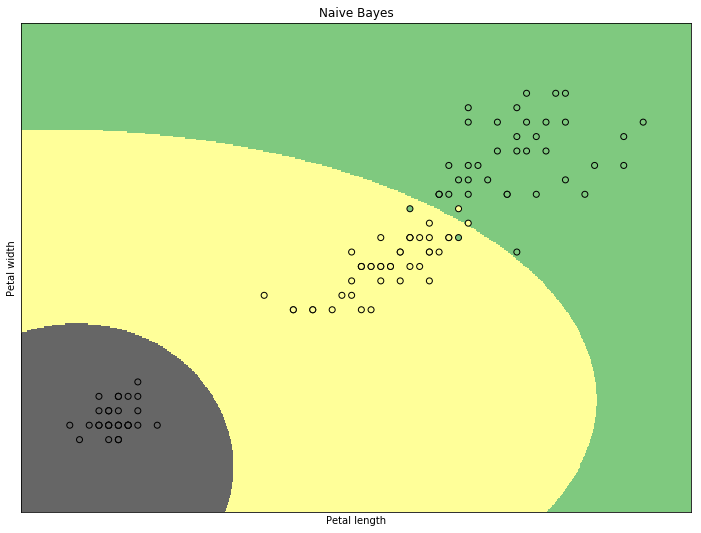

In [136]:
ml_model(LogisticRegression(), 'Logistic Regression')
ml_model(GaussianNB(), 'Naive Bayes')

It's also really easy for us to import and run a new model, in this case a Support Vector Machines (SVM) classifier:

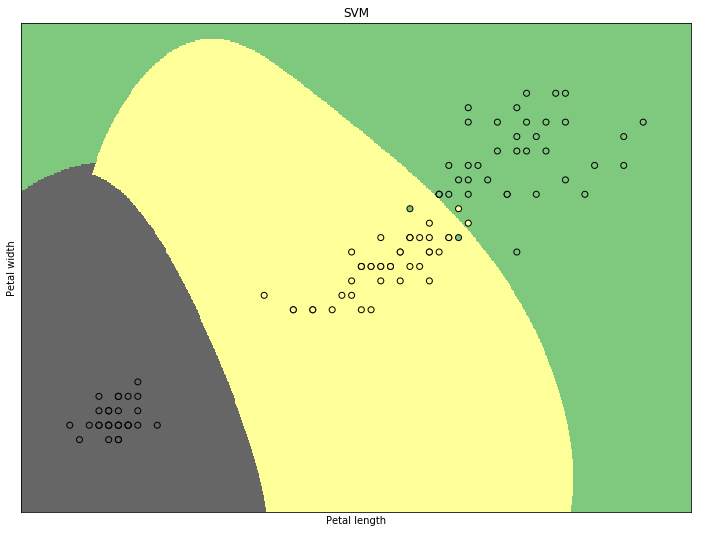

In [137]:
from sklearn.svm import SVC
ml_model(SVC(), 'SVM')

**Performance Measures + Confusion Matrix**

**In Closing**

One important thing to note is that here we've simply taken an algorithm 'off the shelf' and applied it to a dataset. We don't yet know what the algorithm is doing, not have we optimized the parameters that we've assigned to the model (**Hyperparameters**).

Also note that this is a very simple example of using SKL for Machine Learning tasks. In reality it's rare that our data will be as clean as the Iris dataset and it's even rarer to find data that lends itself so well to Machine Learning. We'll be delving deeper into ML algorithms and processes in the upcoming chapters.

#### Further Reading

[Intro to SKL](https://www.oreilly.com/ideas/intro-to-scikit-learn)  
[Train, Test & Cross Validation](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6)  
[Confusion Matrix](https://medium.com/greyatom/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b)  
[Overfitting](https://elitedatascience.com/overfitting-in-machine-learning)